# Coursework Output 2
*Instructions*: In this coursework, you will show your domain of the data related Python skills required for business analytics. To do so, you will use packages such as *numpy* and *matplotlib*.

## Importing and Visualising a Dataset in Python
Each student will be assigned a different dataset in a *comma separated value* (*.csv*) format. The main goal is to import such dataset into Python so that you can wrangle and visualise the data in better ways. This will allow you to get your own conclusions and start building up knowledge regarding on how you could potentially learn from data to predict or classify future instances.

You must create a program which allows you to select from the following options:
1. Import and print your dataset into Python as a numpy array.
2. Query and print an instance of the dataset by row number or by id (i.e. first column of the table).
3. Create a "reduced" dataset (i.e. with less columns) by indicating a list of column names to bring upon this newly created dataset.
4. Plot the dataset by means of a scatterplot which relates two columns specified by the user. The plot has to show the $x$ and $y$ axis labels as the chosen columns, and use the *target/class* column (i.e. the last one) as the colour variable.
5. Exit the program.

## Additional Considerations
* The program has to check that every input is valid.
* No option (except for exit) can be executed until option 1 is executed first.

## Submission Instructions

* Once that you have finished your program, run all cells and run the main program cell using the following sequence of options: 0(wrong option),2(has to fail),1,2(by row index),2(by row name),3,4,5. 
* Then, without clearing the kernel, generate a html **OR** pdf file from the Jupyter notebook. 
* Clear the Jupyter notebook kernel, then name both the Jupyter notebook and the html/pdf files with your id number and submit them to the corresponding Moodle's dropbox before **12th December, 2019**.

In [ ]:
#Use this cell to install all the things that you don't have
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install panda

In [2]:
## Use this cell to import all necessary packages
import csv
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from numpy import cov

In [3]:
## Use this cell to define the function corresponding to OPTION 2
def option1():
    '''With this function you import the dataset into a numpy array.'''
    global data 
    global headers
    #by using this they become global variables 
    with open('baseball.csv', 'r') as f:
        reader = csv.reader(f, delimiter=',')
        # get header from first row
        headers = next(reader)
        # get all the rows as a list
        data = list(reader)
        # transform data into numpy array
        data = np.array(data).astype(float)
        print(headers)
        print(data)
    return data,headers 

In [4]:
## Use this cell to define the function corresponding to OPTION 2

def option2():
    '''This function queries and prints a row of the dataset (by row number or id).'''
    x = True
    while x:
        print('Select 1 to query by row number or 2 to query by row name:')
        x= input()
        if x == '1':
            if not optionrow()==3:
                x=False
            break
        elif x == '2':
            if not optionid()== 3:
                x=False
            break
        else:
            print('Error, please try again.')
    return 

          
        

In [5]:
def optionrow():
    r=True
    count=0
    while count<3:
        try:
            print('Select the row number to query (indexes start in 0)')
            r=int(input())
            if r in range (0,150):
                print(data [r,:])
                r=False
                break  
            else:
                print('The index number is unvalid. Please try again.')
                count+=1
                print("Careful, number of attempts", count, "/3")
                continue
        except ValueError:
            print("Sorry, I didn't understand that, please try again,remember indexes start in 0")
            #try again: return to the start of the loop
            continue
        else:
            #exit the loop.
            break
    return count

In [6]:
def optionid():
    i=True
    count_1=0
    while count_1<3:
        try:
            print('Select the id to query:')
            i=int(input())
            if np.any(data[:,0]== i) :
                print(data[np.where(data[:,0]== i),:])
                i=False
                break
            else:
                print("Sorry I don't recognise that Id")
                count_1 += 1
                print("Careful, number of attempts", count_1, "/3")
                continue
        except ValueError:
            print("Sorry, I didn't understand that, please try again")
            #try again: return to the start of the loop
            continue
        else:
            #exit the loop.
            break 
    return count_1

In [7]:
## Use this cell to define the function corresponding to OPTION 3

def option3():
    '''This function creates a new dataset by indicating which columns to include.'''
    ## Use this cell to update ranks with row and column names
    fresh_names = []
    a=True
    while True:
        try:
            print('Indicate a column to include:') 
            print(headers)
            a= input()   
            if a.lower() in headers:
                fresh= (data[:,headers.index(a.lower())])
                fresh_names.append(a.lower())
                break
            else:
                print('Sorry, the column indicated does not exist or has already been indicated, as a reminder:')
                continue
        except ValueError:
            print('Sorry, try again')
                #try again: return to the start of the loop
            continue
    print('Would you like to include another column?')
    column=True
    while True:
            try:
                column = input ("Enter yes/no to continue")
                if column.lower()=="yes":
                    print('Indicate a column to include:') 
                    print(headers)
                    b= input()
                    if not b.lower() in fresh_names:
                        if b.lower() in headers:
                            fresh_names.append(b.lower())
                            fresh= np.c_[fresh,np.array(data[:,headers.index(b.lower())])]
                            print('Would you like to include another column?')
                            continue 
                        else:
                            print('Sorry, the column indicated does not exist, as a reminder:')   
                            print(headers)
                            continue
                    else:
                        print('Sorry the column has already been indicated, as a reminder:')
                        print(headers)
                        continue            
                elif column.lower()=="no":
                    print('Showing the reduced data set:', fresh_names, fresh)
                    print('Returning to options')
                    break
                else:
                    print("Sorry I did not understand that, enter either yes/no")
            except ValueError:
                print('Sorry, try again')
                #try again: return to the start of the loop
                continue 
    return          
    #ask how to put headers as well, in the included data set 


In [8]:
## Use this cell to define the function corresponding to OPTION 4:
def option4():
    axisx=True
    while True:
        try: 
            print('Select the variable to use as x axis')
            print(headers)
            axisx= input().lower()
            if axisx in headers:
                    new_plot= (data[:,headers.index(axisx)])
                    break
            else:
                print('Sorry, the column does not exist, please try again')
                continue         
        except ValueError:
            print('Sorry, try again')
            #try again: return to the start of the loop
            continue
    axisy=True
    while True:
        try: 
            print('Select the variable to use as y axis')
            print(headers)
            axisy= input().lower()
            if not axisy== axisx:
                if axisy in headers:
                        new_plot= np.c_[new_plot,np.array(data[:,headers.index(axisy)])]
                        break
                else:
                    print('Sorry, the column does not exist, please try again')
                    continue    
            else:
                print("Sorry,this column has already been selected,select a different column.")
                continue
        except ValueError:
            print('Sorry, try again')
            #try again: return to the start of the loop
            continue
    plt.scatter(new_plot[:,0],new_plot[:,1], c=data[:,-1], cmap='flag')
    x= data[:,headers.index(axisx)]
    y= data[:,headers.index(axisy)]
    plt.xlabel(axisx)
    plt.ylabel(axisy)
    plt.xkcd()
    plt.show()
    return

Welcome to Valentina Lauto 1505495 business case.
Select an option (1 to 5):
potato
Error, please try again.
Select an option (1 to 5):
2
The first option to be selected shall be 1. Please try again
Select an option (1 to 5):
1
The dataset has been imported!
['player id', 'team', 'position', 'height', 'weight', 'age', 'transferable?', 'interesting?']
[[4.0100e+02 1.0000e+00 1.0000e+00 ... 2.2990e+01 1.0000e+00 0.0000e+00]
 [7.9900e+02 1.0000e+00 1.0000e+00 ... 3.4690e+01 0.0000e+00 0.0000e+00]
 [1.1970e+03 1.0000e+00 1.0000e+00 ... 3.0780e+01 1.0000e+00 0.0000e+00]
 ...
 [9.3135e+04 7.0000e+00 4.0000e+00 ... 3.2570e+01 0.0000e+00 0.0000e+00]
 [9.3533e+04 7.0000e+00 4.0000e+00 ... 3.7680e+01 0.0000e+00 0.0000e+00]
 [9.3931e+04 7.0000e+00 4.0000e+00 ... 3.7250e+01 0.0000e+00 1.0000e+00]]
Select an option (1 to 5):
2
Select 1 to query by row number or 2 to query by row name:
1
Select the row number to query (indexes start in 0)
potato
Sorry, I didn't understand that, please try again,reme

4
Select the variable to use as x axis
['player id', 'team', 'position', 'height', 'weight', 'age', 'transferable?', 'interesting?']
height
Select the variable to use as y axis
['player id', 'team', 'position', 'height', 'weight', 'age', 'transferable?', 'interesting?']
potato
Sorry, the column does not exist, please try again
Select the variable to use as y axis
['player id', 'team', 'position', 'height', 'weight', 'age', 'transferable?', 'interesting?']
age


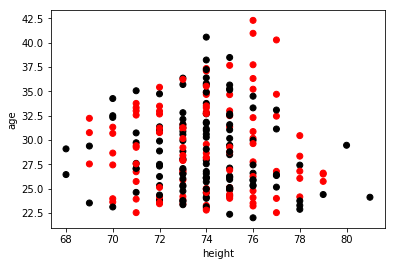

Select an option (1 to 5):
5
Exiting the program


In [9]:
## Use this cell to create the "main" part of your program
print('Welcome to Valentina Lauto 1505495 business case.') 
options = []
x = True
while x:
    print('Select an option (1 to 5):')
    x = input()
    options.append(x)
    if x == '1':
        print('The dataset has been imported!')
        option1()
    elif x == '2':
        if '1' in options:
            option2()
        else:
            print('The first option to be selected shall be 1. Please try again')
    elif x == '3':
        if '1' in options:
            player_id= data[:,headers.index('player id')] 
            headers.index('player id')
            team = headers.index('team')
            position= headers.index('position')
            height= headers.index ('height')
            weight= headers.index('weight')
            age= headers.index('age')
            trans= headers.index('transferable?')
            interesting=headers.index('interesting?')
            option3()
        else:
            print('The first option to be selected shall be 1. Please try again')
    elif x == '4':
        if '1' in options:
            option4()
        else:
            print('The first option to be selected shall be 1. Please try again')
    elif x == '5':
        print('Exiting the program')
        x = False
    else:
         print('Error, please try again.')

## Questions
Please answer the following questions to appraise your level of engagement with the content of the course. Use the Markdown cell corresponding to each question to write your answers.

#### 1. Is there any other data structure or module in Python (besides *numpy*) which would allow you to import a *.csv* file in a more practical and manageable way? Use a code cell to support your answer.

### *Answer*

Another library contained in python that would allow me to import a .csv file in a more practical an manageable way (if compared to numpy arrays) is Panda. -See code contained below. 
By importing the csv through the panda library the data, a part from being more practical, becomes more easy to see and to visualise. 


In [10]:
# Read data from file 'filename.csv' 
# (in the same directory that your jupyternotebook is based)
# Control delimiters, rows, column names with read_csv 
pandita = pd.read_csv("baseball.csv") 
# Preview the first 5 lines of the loaded data 
pandita.head()


,player id,team,position,height,weight,age,transferable?,interesting?
0,401,1,1,74,180,22.99,1,0
1,799,1,1,74,215,34.69,0,0
2,1197,1,1,72,210,30.78,1,0
3,1595,1,2,72,210,35.43,0,0
4,1993,1,2,73,188,35.71,1,1


For example to visualise the information contained in the first Row. I would just have to write this

In [11]:
pandita.loc[0]

player id        401.00
team               1.00
position           1.00
height            74.00
weight           180.00
age               22.99
transferable?      1.00
interesting?       0.00
Name: 0, dtype: float64

#### 2. Using any of the two continuous variables of your dataset, using a cell code show an example of how a **linear regression** could be applied with your dataset to predict the values of future entries of data without target/class (you can implement linear regressions using existing Python modules). Moreover, discuss if there is any metric that can be used to decide which two variables are the most correlated.

### *Answers:*

A linear regression could be applied to my dataset in order to predict the values of future entries without target/class in the following way: (see code)

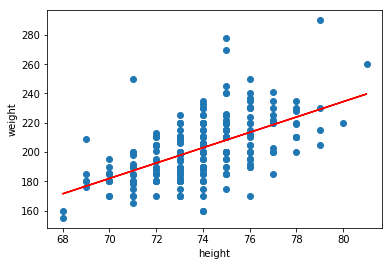

[[202.92946763]
 [202.92946763]
 [192.44067065]
 [192.44067065]
 [197.68506914]
 [176.70747518]
 [176.70747518]
 [187.19627216]
 [213.41826461]
 [187.19627216]
 [197.68506914]
 [197.68506914]
 [202.92946763]
 [202.92946763]
 [176.70747518]
 [181.95187367]
 [197.68506914]
 [208.17386612]
 [223.90706159]
 [229.15146008]
 [213.41826461]
 [202.92946763]
 [213.41826461]
 [192.44067065]
 [187.19627216]
 [208.17386612]
 [218.6626631 ]
 [202.92946763]
 [197.68506914]
 [202.92946763]
 [223.90706159]
 [197.68506914]
 [208.17386612]
 [197.68506914]
 [208.17386612]
 [208.17386612]
 [202.92946763]
 [176.70747518]
 [187.19627216]
 [202.92946763]
 [197.68506914]
 [197.68506914]
 [213.41826461]
 [202.92946763]
 [202.92946763]
 [181.95187367]
 [192.44067065]
 [218.6626631 ]
 [202.92946763]
 [181.95187367]
 [197.68506914]
 [208.17386612]
 [213.41826461]
 [213.41826461]
 [223.90706159]
 [202.92946763]
 [202.92946763]
 [213.41826461]
 [218.6626631 ]
 [239.64025706]
 [223.90706159]
 [208.17386612]
 [218.66

In [12]:
###### Use this cell to implement a linear regression between two variables
X = pandita.iloc[:,3].values.reshape(-1, 1)  # values converts it into a numpy array
Y = pandita.iloc[:, 4].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
x_lab= "height"
y_lab= "weight" 
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.xlabel(x_lab)
plt.ylabel(y_lab)
plt.plot(X, Y_pred, color= 'red')
plt.xkcd()
plt.show()
print (Y_pred) #gives me all the predicitions 


If I would like to predict just one value. Then I would do this 
-see code below:

In [13]:
print('select the height for which you would like to get a weight prediction')
while True:
    try:
        sample=int(input())
        sample_y=linear_regressor.predict([[sample]])
        print("The predicted weight is:" , sample_y)
    except ValueError:
        print("Sorry, I didn't understand that, please try again")
        #try again: return to the start of the loop
        continue
    else:
    #exit the loop.
         break

select the height for which you would like to get a weight prediction
152
The predicted weight is: [[611.99254989]]


There are several metrics that can be used to decide which two variables are the most correlated. Such as Covariance, Pearson’s Correlation and Spearman’s Correlation.

### *Covariance*##
 
" Variables can be related by a linear relationship. This is a relationship that is consistently additive across the two data samples.This relationship can be summarised between two variables, called the covariance"(Brownlee 20018 p.100).In simpler words, covariance is a measure of how much two random variables vary together. 

This is calculated as follows: 

#### cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)



In [14]:
#covariance
# random number generator
seed(1)
# prepare data
ex1 = 30 * randn(500) + 100
ex2 = ex1 + (10 * randn(500) + 50)
# calculate covariance matrix
covariance = cov(ex1, ex2)
print(covariance)
print ('In this specific case, the covariance between the two variables is 887.4')


[[881.01783398 887.44173568]
 [887.44173568 988.79144773]]
In this specific case, the covariance between the two variables is 887.4




###   *Pearson’s Correlation*###

The Pearson correlation coefficient can be used to measure and discover the strength of the linear relationship between two variables (Brownlee 2018).  This is calculated as follows: 
#### Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))




In [15]:
# seed random number generator
seed(1)
# create data 
ex1 = 30 * randn(500) + 100
ex2 = ex1 + (10 * randn(500) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(ex1, ex2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.951



### *Spearman’s Correlation*###

The Spearman correlation evaluates the relationship between two continuous or ordinal variables that change together but not necessarily at a constant rate ( monotonic relationship) Further,the two  variables may not have a normal(Gaussian) distribution.  In this case, the Spearman’s correlation coefficient can be used to summarise the strength between the two data samples(Brownlee 2018). 

This correlation is calculated as follows: 

#### Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) 

In [16]:
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


### *REFERENCES: 

BROWNLEE, J.,2018. *Statistical Methods for Machine Learning*. Vermont, AU :N/A.  